In [35]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
acc=pd.read_csv("accounts.csv")
trans=pd.read_csv("transactions.csv")

In [3]:
acc.head(5)

,id_bank_account,max_date,balance
0,1777,2023-10-11 22:00:00,-15.24
1,1778,2024-03-03 23:00:00,-443.17
2,1780,2024-03-03 23:00:00,2925.13
3,1781,2023-07-16 22:00:00,53.28
4,1785,2024-02-20 23:00:00,118.67


In [4]:
acc.dtypes

id_bank_account      int64
max_date            object
balance            float64
dtype: object

In [5]:
acc.shape

(31436, 3)

In [6]:
trans.dtypes

id_bank_account      int64
date                object
amount             float64
category_l1         object
category_l2         object
dtype: object

In [7]:
trans.shape

(3470566, 5)

In [8]:
nombre_uniques = acc['id_bank_account'].nunique()
print("Nombre d'id_bank_account uniques dans la base account :", nombre_uniques)

Nombre d'id_bank_account uniques dans la base account : 31436


In [9]:
nombre_uniques = trans['id_bank_account'].nunique()
print("Nombre d'id_bank_account uniques dans la base transactions  :", nombre_uniques)

Nombre d'id_bank_account uniques dans la base transactions  : 16051


Nous observons que, dans la base de données des comptes, il y a **31,436** id_bank_account uniques, tandis que dans la base de données des transactions, nous trouvons uniquement **16,051** id_bank_account distincts. <u>Cela indique que certains comptes dans notre base de données n'ont pas de transactions associées</u>. Par conséquent, nous prendrons en compte uniquement ces **16,051** transactions pour nos analyses futures

In [10]:
trans.head(20)

,id_bank_account,date,amount,category_l1,category_l2
0,2012,2021-03-29 22:00:00,-35.78,loan,consumerCredit
1,12244,2023-02-13 23:00:00,-120.00,NaN,NaN
2,17632,2022-12-21 23:00:00,-7.79,unindentifiedPayments,thirdParty
3,1935,2022-01-30 23:00:00,200.00,interPersonalTransfer,NaN
4,19696,2022-07-24 22:00:00,-3.99,brands,retail
5,29935,2022-12-05 23:00:00,5.25,NaN,NaN
6,1927,2021-11-15 23:00:00,-45.90,NaN,NaN
7,2131,2022-02-28 23:00:00,-100.00,ATM,NaN
8,2012,2021-09-27 22:00:00,-137.25,loan,consumerCredit
9,2131,2021-04-13 22:00:00,-1000.00,ATM,NaN


In [11]:
acc.head()

,id_bank_account,max_date,balance
0,1777,2023-10-11 22:00:00,-15.24
1,1778,2024-03-03 23:00:00,-443.17
2,1780,2024-03-03 23:00:00,2925.13
3,1781,2023-07-16 22:00:00,53.28
4,1785,2024-02-20 23:00:00,118.67


In [12]:
scaler = StandardScaler()
acc['balance_normalized'] = scaler.fit_transform(acc[['balance']])

In [85]:
acc.head()

,id_bank_account,max_date,balance,balance_normalized
0,1777,2023-10-11 22:00:00,-15.24,-0.026891
1,1778,2024-03-03 23:00:00,-443.17,-0.032660
2,1780,2024-03-03 23:00:00,2925.13,0.012753
3,1781,2023-07-16 22:00:00,53.28,-0.025967
4,1785,2024-02-20 23:00:00,118.67,-0.025085


In [14]:
acc[acc["id_bank_account"]==1777]

,id_bank_account,max_date,balance,balance_normalized
0,1777,2023-10-11 22:00:00,-15.24,-0.026891


In [15]:
trans[trans["id_bank_account"]==1777]

,id_bank_account,date,amount,category_l1,category_l2
25,1777,2022-01-25 23:00:00,1638.00,incomes,Potentiel
37,1777,2021-10-03 22:00:00,-22.90,brands,retail
39,1777,2021-09-26 22:00:00,1580.06,incomes,Potentiel
41,1777,2022-05-04 22:00:00,-21.53,water,NaN
70,1777,2021-08-01 22:00:00,-6.99,unindentifiedPayments,thirdParty
...,...,...,...,...,...
3459322,1777,2022-12-15 23:00:00,-43.00,unindentifiedPayments,check
3460165,1777,2022-12-29 23:00:00,-8.06,brands,transport
3462971,1777,2023-03-05 23:00:00,-102.49,loanSuspicion,consumerCredit
3465129,1777,2023-05-29 22:00:00,-20.00,brands,cinema


# Reduction de la base account

In [16]:
ids_with_transaction = trans['id_bank_account'].unique()
account= acc[acc['id_bank_account'].isin(ids_with_transaction)]

In [17]:
account.shape

(10577, 4)

In [18]:
ids_with_transaction1 = acc['id_bank_account'].unique()
transaction= trans[trans['id_bank_account'].isin(ids_with_transaction1)]

In [19]:
transaction.shape

(3277707, 5)

In [20]:
transaction["id_bank_account"].nunique()

10577

count    1.057700e+04
mean     5.524084e+03
std      1.275550e+05
min     -5.507157e+04
25%      1.680000e+00
50%      3.838700e+02
75%      1.661190e+03
max      1.238459e+07
Name: balance, dtype: float64


/tmp/ipykernel_493/4082253891.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(account.balance,bins=10,label='Balance')


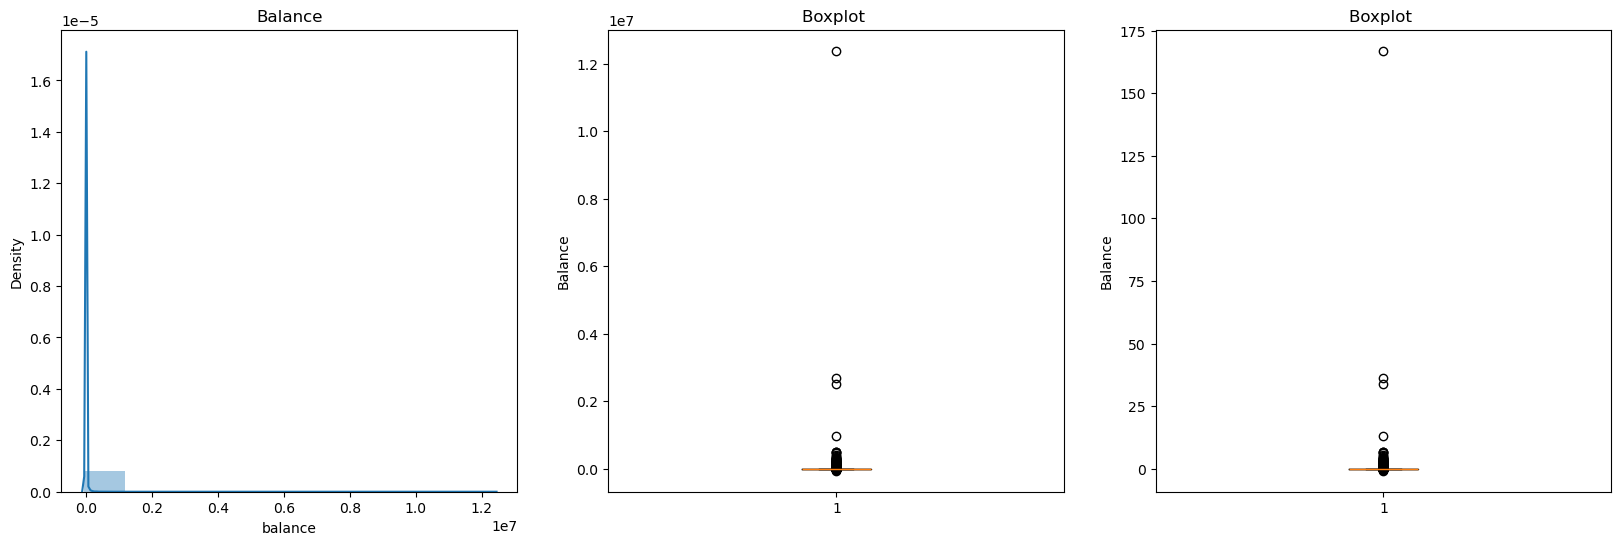

In [21]:
#Apercu générale sur la variable
print(account['balance'].describe())

plt.figure(figsize=(20,6))

#Distribution de la variable
plt.subplot(1,3,1)
sns.distplot(account.balance,bins=10,label='Balance')
plt.title('Balance')



plt.subplot(1,3,2)
plt.boxplot(account["balance"])  
plt.title('Boxplot ')
plt.ylabel('Balance') 
plt.subplot(1,3,3)
plt.boxplot(account["balance_normalized"])  
plt.title('Boxplot ')  
plt.ylabel('Balance')  

# Afficher le graphique
plt.show()

In [22]:
print(trans['category_l1'].value_counts(dropna=False))

category_l1
brands                   932707
NaN                      754827
unindentifiedPayments    258937
smallShops               177624
insurance                175557
personalTransfer         165349
incomes                  153989
ATM                      133517
interPersonalTransfer    122374
loan                     121581
telecom                  115545
bankFees                  99594
energy                    54966
taxes                     45777
overdraft                 42108
savings                   38595
gambling                  29878
loanSuspicion             18688
rent                       9010
rejection                  7877
videoGames                 7169
water                      4244
alimony                     402
fraud                       251
Name: count, dtype: int64


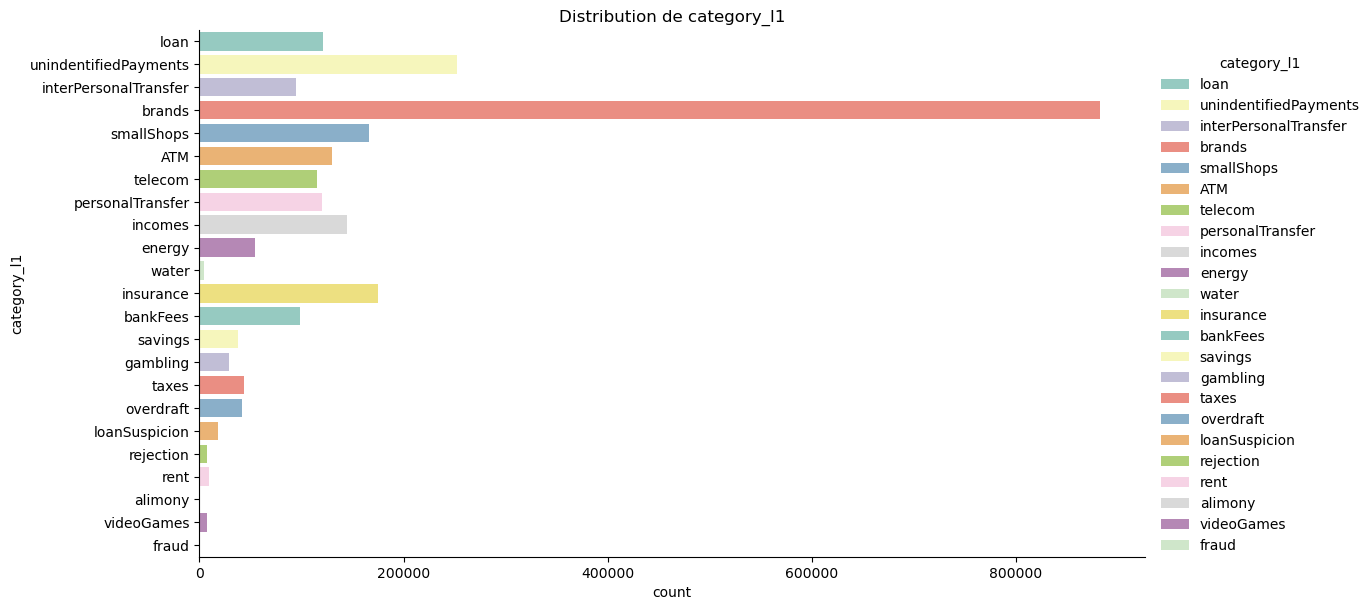

In [23]:
sns.catplot(y='category_l1', kind='count', data=transaction, hue='category_l1', palette='Set3', height=6, aspect=2)

# Réglages esthétiques
plt.title('Distribution de category_l1')
plt.show()

In [24]:
print(trans['category_l2'].value_counts(dropna=False))

category_l2
NaN                                                                                     1566745
retail                                                                                   563597
thirdParty                                                                               159471
transport                                                                                117758
check                                                                                     75330
                                                                                         ...   
Prélèvement de solidarité sur les revenus du patrimoine et les produits de placement         49
CRDS                                                                                         43
turnoverFees                                                                                 13
creditFees                                                                                    5
Taxe foncière               

In [55]:
transaction['category_l2'].nunique()

102

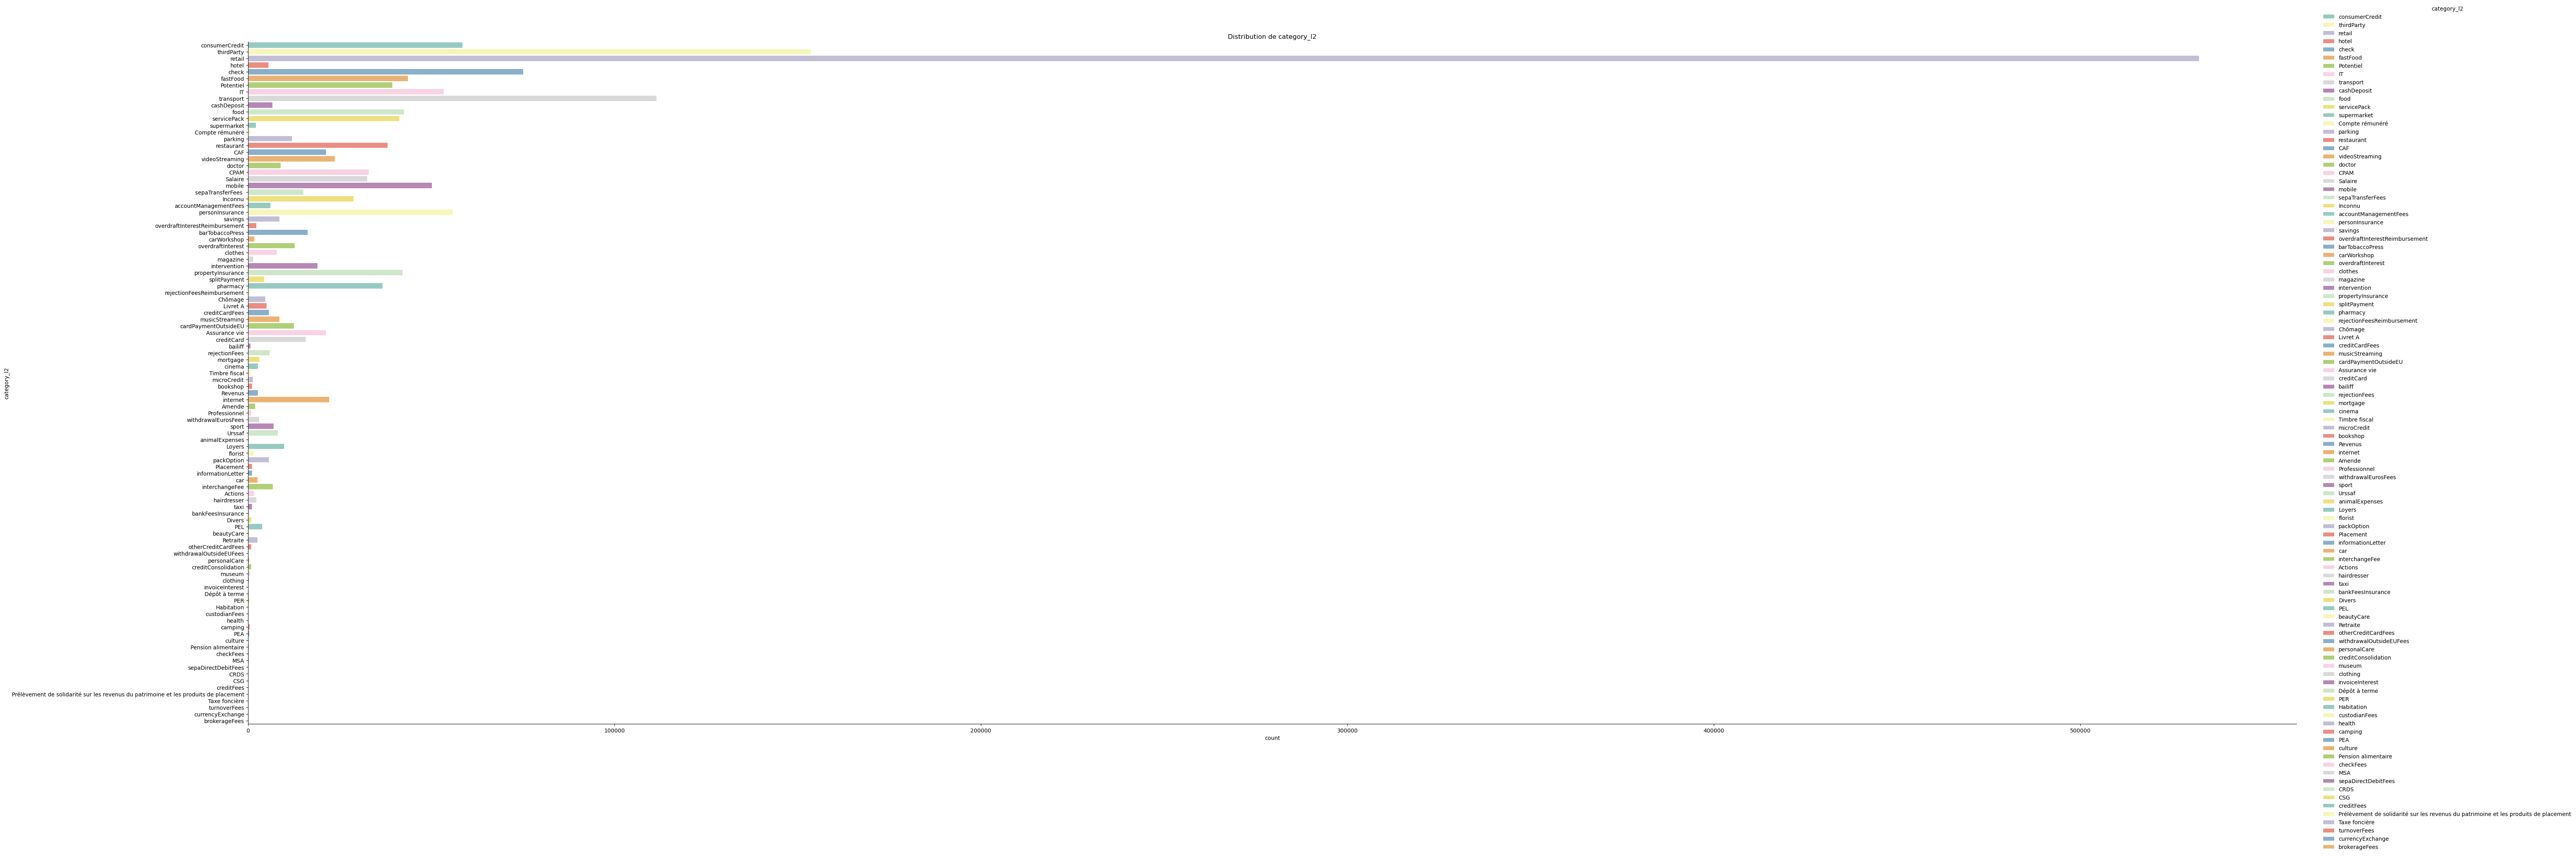

In [25]:
sns.catplot(y='category_l2', kind='count', data=transaction, hue='category_l2', palette='Set3', height=20, aspect=3)

# Réglages esthétiques
plt.title('Distribution de category_l2')
plt.show()

In [26]:
# Effectuer une jointure entre les DataFrames sur la colonne "id_bank"
merged_df = pd.merge(account, transaction.groupby('id_bank_account')['amount'].sum().reset_index(), on='id_bank_account', how='left')

# Renommer la colonne contenant la somme des montants des transactions
merged_df.rename(columns={'amount': 'total_transaction_amount'}, inplace=True)


print(merged_df)


       id_bank_account             max_date  balance  balance_normalized  \
0                 1777  2023-10-11 22:00:00   -15.24           -0.026891   
1                 1778  2024-03-03 23:00:00  -443.17           -0.032660   
2                 1780  2024-03-03 23:00:00  2925.13            0.012753   
3                 1781  2023-07-16 22:00:00    53.28           -0.025967   
4                 1785  2024-02-20 23:00:00   118.67           -0.025085   
...                ...                  ...      ...                 ...   
10572            69919  2024-03-03 23:00:00   712.06           -0.017085   
10573            69920  2024-03-03 23:00:00   -52.72           -0.027396   
10574            69921  2024-03-03 23:00:00   636.33           -0.018106   
10575            69922  2024-03-03 23:00:00  -169.88           -0.028976   
10576            69923  2023-12-25 23:00:00     0.16           -0.026683   

       total_transaction_amount  
0                      24343.13  
1                  

In [27]:
merged_df.head()

,id_bank_account,max_date,balance,balance_normalized,total_transaction_amount
0,1777,2023-10-11 22:00:00,-15.24,-0.026891,24343.13
1,1778,2024-03-03 23:00:00,-443.17,-0.032660,18915.96
2,1780,2024-03-03 23:00:00,2925.13,0.012753,19909.30
3,1781,2023-07-16 22:00:00,53.28,-0.025967,7622.05
4,1785,2024-02-20 23:00:00,118.67,-0.025085,3645.85


In [29]:
merged_df["Solde"]=merged_df["balance"]+merged_df["total_transaction_amount"]

In [30]:
merged_df

,id_bank_account,max_date,balance,balance_normalized,total_transaction_amount,Solde
0,1777,2023-10-11 22:00:00,-15.24,-0.026891,24343.13,24327.89
1,1778,2024-03-03 23:00:00,-443.17,-0.032660,18915.96,18472.79
2,1780,2024-03-03 23:00:00,2925.13,0.012753,19909.30,22834.43
3,1781,2023-07-16 22:00:00,53.28,-0.025967,7622.05,7675.33
4,1785,2024-02-20 23:00:00,118.67,-0.025085,3645.85,3764.52
...,...,...,...,...,...,...
10572,69919,2024-03-03 23:00:00,712.06,-0.017085,698.50,1410.56
10573,69920,2024-03-03 23:00:00,-52.72,-0.027396,185.35,132.63
10574,69921,2024-03-03 23:00:00,636.33,-0.018106,-5279.85,-4643.52
10575,69922,2024-03-03 23:00:00,-169.88,-0.028976,643.99,474.11


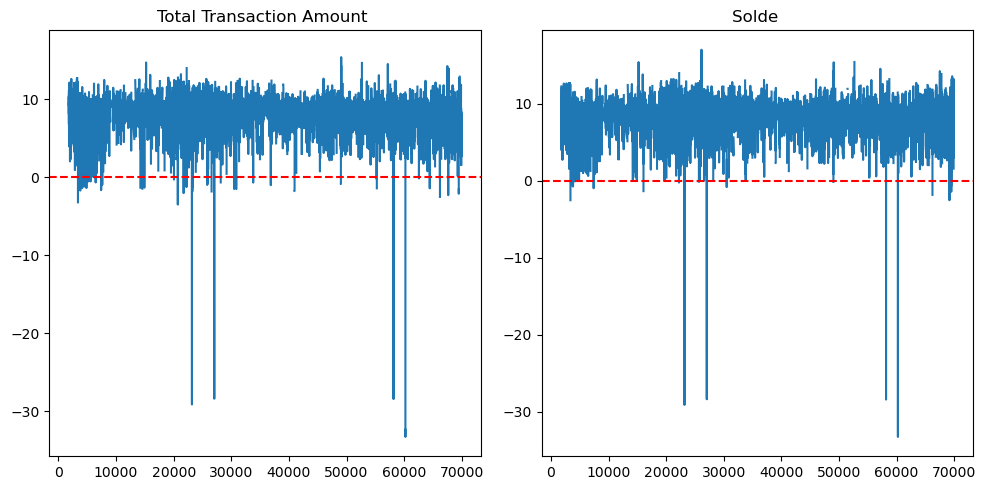

In [51]:
a=np.log(merged_df["total_transaction_amount"])
b=np.log(merged_df["Solde"]) 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 ligne, 2 colonnes

axes[0].plot(merged_df['id_bank_account'], a)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_title('Total Transaction Amount ')

axes[1].plot(merged_df['id_bank_account'], b)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title('Solde ')

plt.tight_layout()  # Pour ajuster correctement les espacements
plt.show()


In [73]:
copy_trans=transaction.copy()

In [74]:
copy_trans['category_l2'] = copy_trans['category_l2'].fillna(copy_trans['category_l1'])


In [75]:
copy_trans.head(20)

,id_bank_account,date,amount,category_l1,category_l2
0,2012,2021-03-29 22:00:00,-35.78,loan,consumerCredit
1,12244,2023-02-13 23:00:00,-120.00,NaN,NaN
2,17632,2022-12-21 23:00:00,-7.79,unindentifiedPayments,thirdParty
3,1935,2022-01-30 23:00:00,200.00,interPersonalTransfer,interPersonalTransfer
5,29935,2022-12-05 23:00:00,5.25,NaN,NaN
6,1927,2021-11-15 23:00:00,-45.90,NaN,NaN
8,2012,2021-09-27 22:00:00,-137.25,loan,consumerCredit
10,2118,2022-01-09 23:00:00,-10.07,brands,retail
11,2118,2021-06-10 22:00:00,-399.62,smallShops,hotel
12,2118,2022-03-23 23:00:00,-120.00,ATM,ATM


In [76]:
copy_trans_sorted = copy_trans.sort_values(by='id_bank_account')

In [77]:
copy_trans_sorted

,id_bank_account,date,amount,category_l1,category_l2
515469,1777,2021-12-06 23:00:00,-6.99,unindentifiedPayments,thirdParty
1437333,1777,2022-04-03 22:00:00,-2.99,unindentifiedPayments,thirdParty
1437298,1777,2021-12-06 23:00:00,200.00,unindentifiedPayments,cashDeposit
1437308,1777,2022-04-26 22:00:00,1662.93,incomes,Potentiel
1469211,1777,2022-07-03 22:00:00,-2.99,unindentifiedPayments,thirdParty
...,...,...,...,...,...
3053188,69923,2023-03-07 23:00:00,39.99,smallShops,sport
1453880,69923,2023-07-02 22:00:00,900.00,NaN,NaN
1019486,69923,2023-12-13 23:00:00,-17.50,overdraft,intervention
1535247,69923,2023-07-02 22:00:00,-200.00,NaN,NaN


In [78]:
copy_trans_sorted['date'] = pd.to_datetime(copy_trans_sorted['date'])

copy_trans_sorted = (copy_trans_sorted.groupby('id_bank_account', group_keys=False, as_index=False).apply(lambda x: x.sort_values(by='date')))

copy_trans_sorted.reset_index(drop=True, inplace=True)


/tmp/ipykernel_493/4272429780.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  copy_trans_sorted = (copy_trans_sorted.groupby('id_bank_account', group_keys=False, as_index=False).apply(lambda x: x.sort_values(by='date')))


In [79]:
copy_trans_sorted

,id_bank_account,date,amount,category_l1,category_l2
0,1777,2021-07-18 22:00:00,-10.79,brands,transport
1,1777,2021-07-18 22:00:00,-6.99,unindentifiedPayments,thirdParty
2,1777,2021-07-18 22:00:00,-29.52,brands,transport
3,1777,2021-07-18 22:00:00,-10.99,unindentifiedPayments,thirdParty
4,1777,2021-07-18 22:00:00,-27.45,brands,retail
...,...,...,...,...,...
3277702,69923,2023-10-19 22:00:00,330.00,NaN,NaN
3277703,69923,2023-11-06 23:00:00,-3.37,NaN,NaN
3277704,69923,2023-11-13 23:00:00,-8.00,overdraft,intervention
3277705,69923,2023-11-20 23:00:00,8.00,overdraft,intervention


In [83]:
merged_df

,id_bank_account,max_date,balance,balance_normalized,total_transaction_amount,Solde
0,1777,2023-10-11 22:00:00,-15.24,-0.026891,24343.13,24327.89
1,1778,2024-03-03 23:00:00,-443.17,-0.032660,18915.96,18472.79
2,1780,2024-03-03 23:00:00,2925.13,0.012753,19909.30,22834.43
3,1781,2023-07-16 22:00:00,53.28,-0.025967,7622.05,7675.33
4,1785,2024-02-20 23:00:00,118.67,-0.025085,3645.85,3764.52
...,...,...,...,...,...,...
10572,69919,2024-03-03 23:00:00,712.06,-0.017085,698.50,1410.56
10573,69920,2024-03-03 23:00:00,-52.72,-0.027396,185.35,132.63
10574,69921,2024-03-03 23:00:00,636.33,-0.018106,-5279.85,-4643.52
10575,69922,2024-03-03 23:00:00,-169.88,-0.028976,643.99,474.11


In [95]:
a=copy_trans_sorted[copy_trans_sorted["category_l2"]=="rejectionFees"]

In [96]:
a

,id_bank_account,date,amount,category_l1,category_l2
3007,1780,2021-02-12 23:00:00,-20.0,overdraft,rejectionFees
3525,1780,2023-10-13 22:00:00,-20.0,overdraft,rejectionFees
5737,1799,2022-06-06 22:00:00,-8.0,overdraft,rejectionFees
19489,1873,2021-12-05 23:00:00,-16.0,overdraft,rejectionFees
19596,1873,2022-02-06 23:00:00,-24.0,overdraft,rejectionFees
...,...,...,...,...,...
3268733,69730,2024-01-14 23:00:00,-20.0,overdraft,rejectionFees
3271820,69789,2024-02-09 23:00:00,-20.0,overdraft,rejectionFees
3274697,69859,2024-01-21 23:00:00,-11.0,overdraft,rejectionFees
3274700,69859,2024-01-30 23:00:00,-11.0,overdraft,rejectionFees


In [105]:
liste_refound=a["id_bank_account"].unique()
print(liste_refound)

[ 1780  1799  1873  1877  1900  1934  1948  1950  1958  1968  1976  2012
  2023  2025  2064  2086  2118  2122  2162  2231  2242  2259  2284  2290
  2294  2296  2352  2362  2366  2388  2395  2397  2401  2406  2424  2445
  2457  2463  2469  2498  2515  2538  2554  2568  2601  2602  2613  2617
  2618  2652  2662  2716  2717  2720  2730  2772  2804  2826  2835  2862
  2907  2925  2929  2934  2941  2946  2950  2955  2968  2976  2999  3017
  3031  3061  3075  3086  3114  3121  3128  3140  3142  3143  3147  3153
  3171  3176  3185  3222  3228  3247  3250  3260  3265  3275  3289  3307
  3343  3575  3682  3751  3752  3764  3769  3787  3797  3801  3811  3813
  3833  3838  3843  3851  3857  3859  3869  3890  3906  3910  3923  3941
  3952  3959  3962  4008  4009  4017  4020  4030  4031  4033  4095  4133
  4147  4149  4162  4166  4208  4231  4267  4275  4306  4332  4343  4382
  4388  4391  4422  4461  4485  4489  4496  4506  4512  4541  4595  4633
  4660  4671  4690  4720  4750  4758  4765  4803  4

In [135]:
merged_df.drop(columns=['refound'], axis=1, inplace=True)

In [137]:
merged_df['fraud'] = merged_df['id_bank_account'].isin(liste_refound).astype(int)
merged_df

,id_bank_account,max_date,balance,balance_normalized,total_transaction_amount,Solde,fraud
0,1777,2023-10-11 22:00:00,-15.24,-0.026891,24343.13,24327.89,0
1,1778,2024-03-03 23:00:00,-443.17,-0.032660,18915.96,18472.79,0
2,1780,2024-03-03 23:00:00,2925.13,0.012753,19909.30,22834.43,1
3,1781,2023-07-16 22:00:00,53.28,-0.025967,7622.05,7675.33,0
4,1785,2024-02-20 23:00:00,118.67,-0.025085,3645.85,3764.52,0
...,...,...,...,...,...,...,...
10572,69919,2024-03-03 23:00:00,712.06,-0.017085,698.50,1410.56,0
10573,69920,2024-03-03 23:00:00,-52.72,-0.027396,185.35,132.63,0
10574,69921,2024-03-03 23:00:00,636.33,-0.018106,-5279.85,-4643.52,0
10575,69922,2024-03-03 23:00:00,-169.88,-0.028976,643.99,474.11,0


In [138]:
merged_df["fraud"].value_counts()

fraud
0    9764
1     813
Name: count, dtype: int64